In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# cd drive/MyDrive/Colab\ Notebooks/cp2/ml-100k

In [ ]:
# # 파일들을 프린트합니다
# from glob import glob
# for filename in glob('*'):
#     print(filename)

In [ ]:
# # 각 파일의 shape, head를 출력하는 함수
# from IPython.display import display
# import pandas as pd


# # 다양하게 나눠진 테이블
# # 따라서 merge의 기능이 중요해진다.
# def preview():
#     for filename in glob('*'):
#         df = pd.read_csv(filename, encoding='ISO-8859-1', error_bad_lines=False)
#         print(filename, df.shape)
#         display(df.head())
#         print('\n')

In [ ]:
#preview()

# **수정 사항**

1. 데이터 사이즈 통일 부탁합니다. (one million size 디스코드 압축파일로 수령.)
2. 데이터 정의서 기록 부탁합니다. (초반에 넣어주세요)
3. EDA(스토리텔링, 기승전결) 및 시각화 관련 피드백 부분 수정해주세요.
4. 슬비님과 데이터를 통합합니다.
5. 직업군별 연령의 분포, 성별의 분포 .. 와 같은 것을 확인. 깊이 있게 EDA 부탁합니다. -> '우리가 이것을 모델에 적용시키겠다' 라는 시나리오가 필요해요


# **주의 사항**
- info 같은 것은 굳이 하지 않아도 됩니다. (EDA단계에서는 주석을 한 줄, 한 줄 작성할 필요가 없다. plt같은 경우는 보면 알기 때문.)
- 시각화 자료가 무엇을 의미하는 것인지에 대해서 기재.
- 이것들을 왜 만들었고 왜 조합했는지, 어떻게 해석했는지 기재하면 더 도움이 된다.
- 변수는 내가 만든 것이기 때문에. 왜 무엇을 만든 것인지 주석 기록해주시면 좋습니다.



# **주간 보고서**
1. 옵션1 선택 - 데이터 사이즈 변경 (모델의 정확도를 높이기 위해서), 모델에 연령대&직업군과 같은 변수를 추가해서 정확도가 높은 모델을 만들어 보고자 한다.
2. 오프라인 미팅 내용 :
EDA 스토리라인이 부족, 시각화 자료를 다르게 구성해야 한다, 옵션1 선택에 따른 추가적인 EDA가 필요합니다. -> 피드백을 받았고 현재 수정중입니다. 해당 내용 수정 후 슬비님 코드와의 통합 및 변수를 추가한 모델링 예정. + 모델 고도화.
3. 프로젝트 자체에 대한 고민보다는 프로젝트 기간 종료 후, 이것을 포트폴리오로서 사용할 수 있을 것이며 완벽하지 않은 상태에서 취업(면접)을 준비하는 것이 맞는지, 아니면 공부를 더 진행한 다음에 취업을 하는 것이 맞는지(그렇게 되면 하반기 졸업생에게 밀릴 가능성이 있음) 에 대한 고민이 있다.
DA를 희망하는 사람으로서 SQL을 공부하고 있는데, 이것을 금번 프로젝트에 또, 포트폴리오에 어떻게 적용을 시켜야할지 방향성에 대한 고민이 있다. (어려움 공유)

In [ ]:
# 모든 변수가 똑같이 중요하다고 생각하면 안됩니다. 모든 변수가 똑같이 중요하지 않아요.
# 어떻게 하면 중요변수, 중요하지 않은 변수 판단할 수 있을가요?
# 아웃라이어(이상치), 아웃라이어의 기준은? box plot을 찾았다면? -> 제거 등... EDA, 분산값, 표준편차
# 시각화, 결측치 제거, 정규화 등...
# 모델들이 요구하는 사항들이 있습니다. 형식에 맞춰 input을 해야 합니다.
# 하이퍼 파라미터 - 조합식 -> Auto ML 사용. 더 중요한 것. 각각의 하이퍼 파라미터가 어떤 영향을 끼치는 지 알아야 한다.
# 모델 성능이 안좋으면 EDA 부터 다시 시작, 모델도 다시 찾아보고... 계속 반복 또 반복. -> 새로운 ML 탐색하기.
# 논문이 정리된 블로그를 볼 것.[Chat GPT가 잘 찾아 줄 것이예요]
# 딥러닝은 예측을 굉장히 잘 합니다. 유사도(실수-벡터) -> 딥러닝에게...
# 의사결정나무 성능이 아쉬워요(현장에서) -> 강점은 설명력이 강하다는 것.
# XAI 설명이 가능해야 합니다. 추천 시스템에 대한 이해도가 높아야 합니다. 


# 어떤 사람은 어떤 영화를 본다는 패턴을 발견할 수 있다.
# 취향을 고려하는 것은 movielens 데이터셋에서 찾기 어려울 수 있다. 평점밖에 없기 때문에.
# 오프라인 평가 모델 -> 꼭 하셔야 합니다. 그래야 포폴에 넣을 수 있어요.
# recall@k, pricision@k 같은 것 해보셔야 합니다.

# **피드백 모음집 (Ctrl+F 로 상세 위치 확인 가능)**

In [ ]:
# 피드백1
# 초반에는  info로
# 굳이 만들지 않아도 되는 변수는 삭제할 것. 

# 피드백2
# 그래프를 병렬적으로 보기 쉽게 표현해주세요. 남자, 여자 몇 위 ... -> 알기 쉽게끔 정리해주시는 것이 좋아요.
# EDA는 큰 덩어리에서 시작해서 점점 세분화 하며 진행 하는 방향으로.

# 피드백3
# 영화 리뷰를 한 사람이 몇 명이니(의미가 없으니) 날리겠다.
# 위 처럼 출력하는 것이 아닌 시각화(바챠트)
# 테이블로 보여주면 전체가 보여지는 것이 아님. 상대방은 알 수가 없어요.

# 피드백4
# 이런 시각화는 처음에 해주는 것이 좋아요. -> EDA도 스토리가 있어야 해요. 기승전결
# 데이터 EDA는 초반에, 이후에 인사이트 
# Depth있게 진행. 그래야 협업하는 사람도 이해할 수 있어요.

# 피드백5
# 영화 재개봉 가능성.
# 삭제를 하게 된다면 근거 적기.

# 피드백6
# 이 그래프도 상단에 적고,
# 비슷한 류의 그래프가 있으니 둘 중에 하나만 선택해서 기록해주세요.

# 피드백7
# 이런 스택챠트 보다 바 챠트를 양쪽으로.
# 여자의 경우 뮤지컬 - 미스테리 비율 달라요... 따라서 성별별로 따로 그리는 것이 좋다.

# 피드백8
# 위의 그래프도 스택 챠트가 아니라, 따로 표현하는 것이 좋다.
# 각 그룹의 비율이 다를 수 있어요.

# 피드백9
# EDA는 데이터에 입각 - 2000년도의 데이터 분포를 보여줘야한다.
# 지금 제가 낸 의견은 주관적입니다. -> 근거가 있어야 합니다.

# 피드백10
# 0.3의 경우에는 크게 의미가 없기 때문에 other 항목으로.
# 의미있는 비율들만 중점적으로 보는 것이 좋아요.

# 피드백 이외에도 내가 더 할 수 있는 것은 무엇인가요? 120% 발휘해보세요.

# **users(유저 정보)**

In [ ]:
u_cols =  ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users_file = 'https://raw.githubusercontent.com/yunong-E/cp2-Recommendation-System/main/ml-100k/u.user'
users = pd.read_csv('./u.user', sep='|', names=u_cols, encoding='ISO-8859-1')

usernum = users.shape[0]
print('Number of users:', usernum)

Number of users: 943


In [ ]:
users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [ ]:
# 중복값이 없음을 확인
users.duplicated().sum()

0

In [ ]:
users.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

# **items(영화 정보)**

In [ ]:
#items
i_cols = ['movie_id', 'movie_title' ,'release_date','video_release_date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# release_date 컬럼은 datetime 형식으로 불러오기.
items_file = 'https://raw.githubusercontent.com/yunong-E/cp2-Recommendation-System/main/ml-100k/u.item'
items = pd.read_csv(items_file, sep='|', names=i_cols, encoding='ISO-8859-1', parse_dates=["release_date"])

n_items = items.shape[0]
print("Number of items:",n_items)

Number of items: 1682


In [ ]:
items

,movie_id,movie_title,release_date,video_release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998-02-06,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),1998-02-06,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),1998-01-01,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_id            1682 non-null   int64         
 1   movie_title         1682 non-null   object        
 2   release_date        1681 non-null   datetime64[ns]
 3   video_release_date  0 non-null      float64       
 4   IMDb URL            1679 non-null   object        
 5   unknown             1682 non-null   int64         
 6   Action              1682 non-null   int64         
 7   Adventure           1682 non-null   int64         
 8   Animation           1682 non-null   int64         
 9   Children's          1682 non-null   int64         
 10  Comedy              1682 non-null   int64         
 11  Crime               1682 non-null   int64         
 12  Documentary         1682 non-null   int64         
 13  Drama               1682 non-null   int64       

In [ ]:
# video_release_date 컬럼 삭제.
items.drop(columns='video_release_date', axis=1, inplace=True)
items

,movie_id,movie_title,release_date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998-02-06,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),1998-02-06,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),1998-01-01,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),1994-01-01,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **rating(평점 정보)**

In [ ]:
# 데이터셋의 각 feature는 아래와 같이 볼 수 있고, 기본적인 유저가 영화에 대한 평점을 내린 정보기록임을 알 수 있다.

# userId: 유저의 식별정보. 개별 유저의 id를 의미함 ex. 196번 유저, 186번 유저
# movieId: 영화(아이템)의 식별정보. 개별 영화의 id를 의미함 ex. 242번 영화, 302번 영화
# rating: 유저가 해당 영화를 보고 내린 평점
# timestamp: 유저가 해당 영화를 보고 평점을 내린 시간 정보

In [ ]:
r_cols =  ['user_id', 'movie_id', 'rating', 'timestamp']
rating_file = 'https://raw.githubusercontent.com/yunong-E/cp2-Recommendation-System/main/ml-100k/u.data'
rating = pd.read_csv(rating_file, sep='\t', names=r_cols, encoding='ISO-8859-1')

rating_num = rating.shape[0]
unique_rating_num = len(rating.user_id.unique())

print('Number of Users:', rating_num)
print('Number of Unique users:', unique_rating_num)

Number of Users: 100000
Number of Unique users: 943


In [ ]:
rating

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
xitem = items.values
# 영화의 장르는 19개. X_train_counts is an array of 1682x19 (1682 movies and 19 movie genres) 
X_train_counts = xitem[:, -19:]
print(X_train_counts.shape)

(1682, 19)


In [ ]:
# 피드백1
# 초반에는  info로
# 굳이  만들지  않아도  되는  변수는 삭제 

# **EDA**

In [ ]:
users['sex'].value_counts(), users['sex'].value_counts(normalize=True)

(M    670
 F    273
 Name: sex, dtype: int64,
 M    0.710498
 F    0.289502
 Name: sex, dtype: float64)

([<matplotlib.patches.Wedge at 0x7fbf8f48bf70>,
 [Text(-0.6755578327105941, 0.8681138258681089, 'M'),
  Text(0.6755577514319091, -0.8681138891183939, 'F')],
 [Text(-0.3684860905694149, 0.4735166322916957, '71.0%'),
  Text(0.3684860462355868, -0.47351666679185117, '29.0%')])

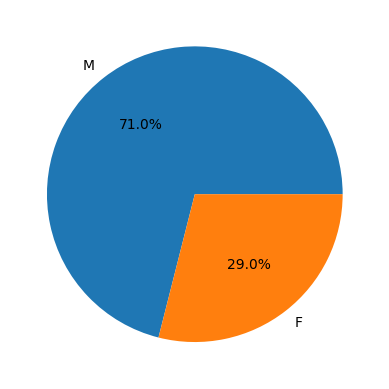

In [ ]:
# 성별 파이챠트 - 남성의 비율이 압도적으로 높음을 알 수 있다.
labels = ['M', 'F']
plt.pie(users['sex'].value_counts(normalize=True), labels=labels, autopct='%.1f%%')

In [ ]:
# EDA를 위한 join 진행.
rating_user_df = rating.join(other=users, how='inner', on='user_id', lsuffix='_R') # 평점 + 유저
rating_user_movie_df = rating_user_df.join(other=items, how='inner', on='movie_id', rsuffix='_M') # (평점+유저)+영화
rating_movie_df = rating.join(other=items, how='inner', on='movie_id', rsuffix='_M') # 평점 + 영화

In [ ]:
rating_user_df.head(3)

,user_id_R,movie_id,rating,timestamp,user_id,age,sex,occupation,zip_code
0,196,242,3,881250949,197,55,M,technician,75094
940,196,393,4,881251863,197,55,M,technician,75094
1133,196,381,4,881251728,197,55,M,technician,75094


In [ ]:
rating_user_movie_df.head(3)

,user_id_R,movie_id,rating,timestamp,user_id,age,sex,occupation,zip_code,movie_id_M,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,197,55,M,technician,75094,243,...,0,0,0,0,0,0,0,0,0,0
95720,305,242,5,886307828,306,45,M,other,73132,243,...,0,0,0,0,0,0,0,0,0,0
56433,6,242,4,883268170,7,57,M,administrator,91344,243,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
rating_movie_df.head(3)

,user_id,movie_id,rating,timestamp,movie_id_M,movie_title,release_date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,243,Jungle2Jungle (1997),1997-03-07,http://us.imdb.com/M/title-exact?Jungle2Jungle...,0,0,...,0,0,0,0,0,0,0,0,0,0
253,63,242,3,875747190,243,Jungle2Jungle (1997),1997-03-07,http://us.imdb.com/M/title-exact?Jungle2Jungle...,0,0,...,0,0,0,0,0,0,0,0,0,0
629,226,242,5,883888671,243,Jungle2Jungle (1997),1997-03-07,http://us.imdb.com/M/title-exact?Jungle2Jungle...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 수평 막대그래프를 그려주는 함수.
def draw_horizontal_movie_bar(movie_titles, ratings_count, title=''):
    plt.figure(figsize=(10, 5))
    sns.barplot(y=movie_titles, x=ratings_count, orient='h')
    plt.title(title)
    plt.ylabel('Movies')
    plt.xlabel('Count')
    plt.show()

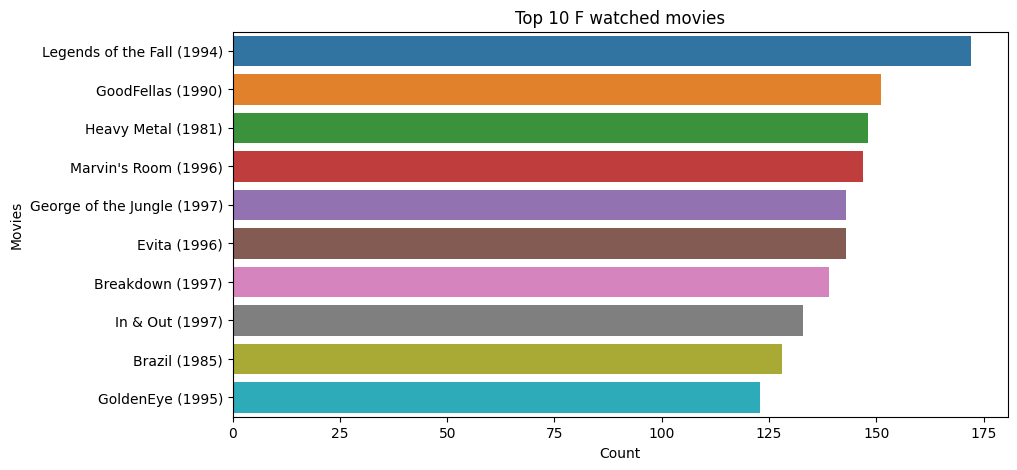

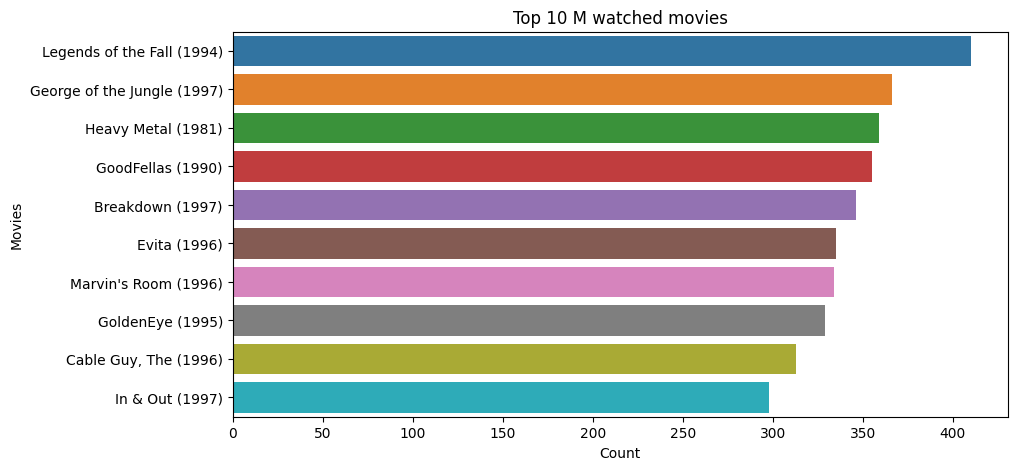

In [ ]:
# 성별별 top10 관람영화
# 1위 영화 이후의 영화들에서 순위 차이가 보이지만 커다란 인사이트를 주지는 않는다.
top_rated_movies_gender_wise = rating_user_movie_df.groupby(['sex', 'movie_id']).size()

for index_label in top_rated_movies_gender_wise.index.get_level_values(0).unique():

    top_10_userkind_rated_movies = top_rated_movies_gender_wise[index_label].sort_values(ascending=False)[:10]
    top_10_userkind_rated_movie_titles = items.iloc[top_10_userkind_rated_movies.index].movie_title
    draw_horizontal_movie_bar(top_10_userkind_rated_movie_titles.values, top_10_userkind_rated_movies.values, f'Top 10 {index_label} watched movies')

In [ ]:
# 피드백2
# 병렬적으로 보기 쉽게. 남자, 여자 몇 위 ... -> 알기 쉽게끔 정리해주시는 것이 좋아요.
# EDA는 큰 덩어리에서 시작해서 점점 세분화 하며 진행 하는 방향으로.

In [ ]:
# movie_title = [영화id, 영화 타이틀]
movie_title = items[['movie_id', 'movie_title']]
movie_title

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [ ]:
# 영화 평점 테이블(rating)과 movie_title 테이블을 병합.
# moive_id 컬럼 기준으로 병합했으며, 평가 점수를 영화 타이틀과 함께 확인할 수 있다.
df = pd.merge(rating, movie_title, on='movie_id')
df.head()

,user_id,movie_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [ ]:
# 영화별 평균 별점 
# 주의! 1명밖에 관람하지 않은 영화에 (영화를 관림한 그 1명이) 별점을 5점 부여한다면, 5점이 나온다. -> 완벽한 5점이 아님.
df.groupby('movie_title').mean()['rating'].sort_values(ascending=False)

movie_title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [ ]:
# 피드백3
# 영화 리뷰를 한 사람이 몇 명이니.. (의미가 없으니) 날리겠다.
# 위 처럼 출력하는 것이 아닌 시각화(바챠트)
# 테이블로 보여주면 전체가 보여지는 것이 아님. 상대방은 알 수가 없어요.

In [ ]:
# 각 영화는 몇 회씩 관람 되었나요? or 각 영화는 몇 개의 평가가 확인되나요?
df.groupby('movie_title').count()['rating'].sort_values(ascending=False)

movie_title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [ ]:
# 영화의 평균 평점을 확인할 수 있는 테이블
ratings_df = pd.DataFrame(df.groupby('movie_title').mean()['rating'])
ratings_df

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [ ]:
# 영화의 평균 평점을 확인할 수 있는 테이블에 평가 인원 컬럼을 추가.
ratings_df['number of ratings'] = pd.DataFrame(df.groupby('movie_title').count()['rating'])
ratings_df.sort_values(by='rating', ascending=False)

,rating,number of ratings
movie_title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


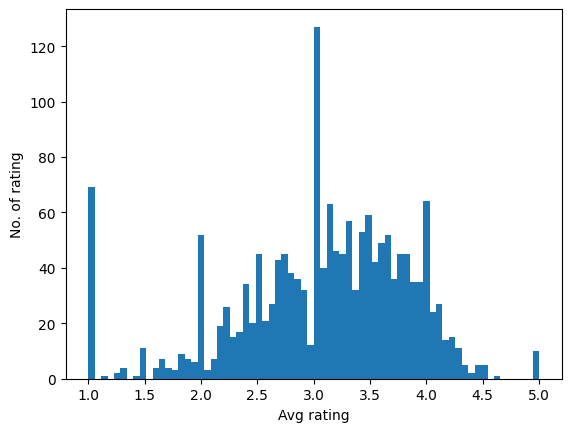

In [ ]:
# 별점(ratings)의 분포
plt.hist(ratings_df['rating'], bins=70)
plt.xlabel('Avg rating')
plt.ylabel('No. of rating')
plt.show()

In [ ]:
# 피드백4
# 이런 시각화는 처음에 해주는 것이 좋아요. -> EDA도 스토리가 있어야 해요. 기승전결
# 데이터 EDA는 초반에, 이후에 인사이트 
# Depth있게 진행. 그래야 협업하는 사람도 이해할 수 있어요.

<Axes: xlabel='rating', ylabel='Density'>

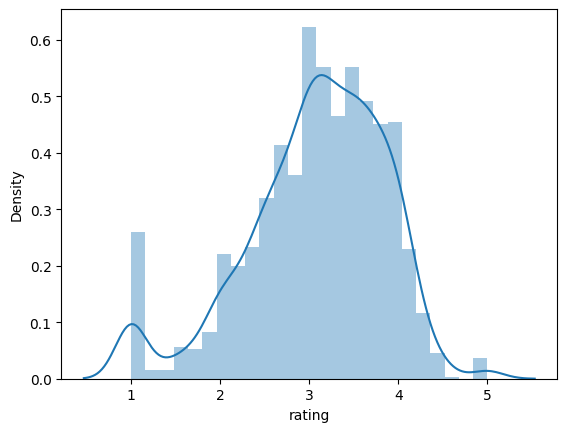

In [ ]:
# 깔끔하지 않은 정규분포의 모형을 확인할 수 있다. (별점(ratings)의 밀도)
# 데이터의 수가 적은 탓일까?
sns.distplot(ratings_df['rating'])

In [ ]:
df[(df['user_id']==894)].sort_values(by='movie_id')

,user_id,movie_id,rating,timestamp,movie_title
3794,894,1,4,880416286,Toy Story (1995)
32695,894,7,4,880993632,Twelve Monkeys (1995)
65368,894,9,4,880416039,Dead Man Walking (1995)
29597,894,10,4,880416381,Richard III (1995)
43797,894,12,5,881625708,"Usual Suspects, The (1995)"
...,...,...,...,...,...
58529,894,1462,3,882404642,"Thieves (Voleurs, Les) (1996)"
99006,894,1501,4,882404363,Prisoner of the Mountains (Kavkazsky Plennik) ...
99452,894,1560,4,882404641,Clean Slate (Coup de Torchon) (1981)
99303,894,1592,4,889469391,"Magic Hour, The (1998)"


In [ ]:
# 피드백5
# 영화 재개봉 가능성.
# 삭제를 하게 된다면 근거 적기.

In [ ]:
# 영화명이 동일한데 영화id는 다르다?
df[df['movie_title']=='Chasing Amy (1997)'].sort_values(by='user_id')

,user_id,movie_id,rating,timestamp,movie_title
22187,1,268,5,875692927,Chasing Amy (1997)
4752,1,246,5,874965905,Chasing Amy (1997)
22176,3,268,3,889236961,Chasing Amy (1997)
22217,6,268,3,883268406,Chasing Amy (1997)
4757,6,246,3,883599509,Chasing Amy (1997)
...,...,...,...,...,...
22345,928,268,5,880935814,Chasing Amy (1997)
4845,928,246,5,880937184,Chasing Amy (1997)
4841,936,246,4,886832282,Chasing Amy (1997)
22305,936,268,4,886831415,Chasing Amy (1997)


In [ ]:
df[(df['movie_id']==268)].sort_values(by='movie_id')

,user_id,movie_id,rating,timestamp,movie_title
22107,99,268,3,885678247,Chasing Amy (1997)
22268,842,268,5,891218059,Chasing Amy (1997)
22269,747,268,5,888638091,Chasing Amy (1997)
22270,509,268,2,883590443,Chasing Amy (1997)
22271,397,268,4,889760703,Chasing Amy (1997)
...,...,...,...,...,...
22197,620,268,4,889986452,Chasing Amy (1997)
22198,551,268,4,892775516,Chasing Amy (1997)
22199,369,268,5,889428642,Chasing Amy (1997)
22186,589,268,1,883352463,Chasing Amy (1997)


In [ ]:
df[(df['movie_id']==246)].sort_values(by='movie_id')

,user_id,movie_id,rating,timestamp,movie_title
4725,50,246,3,877052329,Chasing Amy (1997)
4815,893,246,3,874829968,Chasing Amy (1997)
4814,637,246,2,882903447,Chasing Amy (1997)
4813,557,246,5,880485693,Chasing Amy (1997)
4812,919,246,3,875288523,Chasing Amy (1997)
...,...,...,...,...,...
4759,130,246,4,874953698,Chasing Amy (1997)
4758,376,246,3,879459054,Chasing Amy (1997)
4757,6,246,3,883599509,Chasing Amy (1997)
4770,542,246,3,886532359,Chasing Amy (1997)


In [ ]:
# 이럴 수가 있나요?

In [ ]:
movie_title[movie_title['movie_id']==246]

,movie_id,movie_title
245,246,Chasing Amy (1997)


In [ ]:
movie_title[movie_title['movie_id']==268]

,movie_id,movie_title
267,268,Chasing Amy (1997)


In [ ]:
# rating(영화 평점) 카운트
rating_count_df = pd.DataFrame(rating.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
1,6110
2,11370
3,27145
4,34174
5,21201


Text(0, 0.5, 'number of ratings')

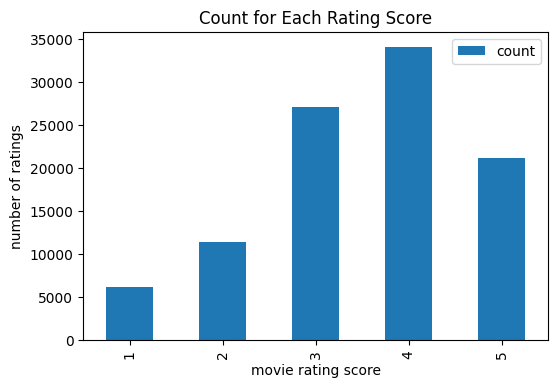

In [ ]:
# rating(영화 평점) 카운트 그래프
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(6, 4),
    title='Count for Each Rating Score',
    fontsize=10)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [ ]:
# 피드백6
# 이 그래프도 상단에 적고,
# 비슷한 류의 그래프가 있으니 둘 중에 하나만 선택해서 기록해주세요.

In [ ]:
# top10 영화 (인기)리스트는 무엇일까?
best = df.groupby('movie_title').size().sort_values(ascending=False)[:10]
best

movie_title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
dtype: int64

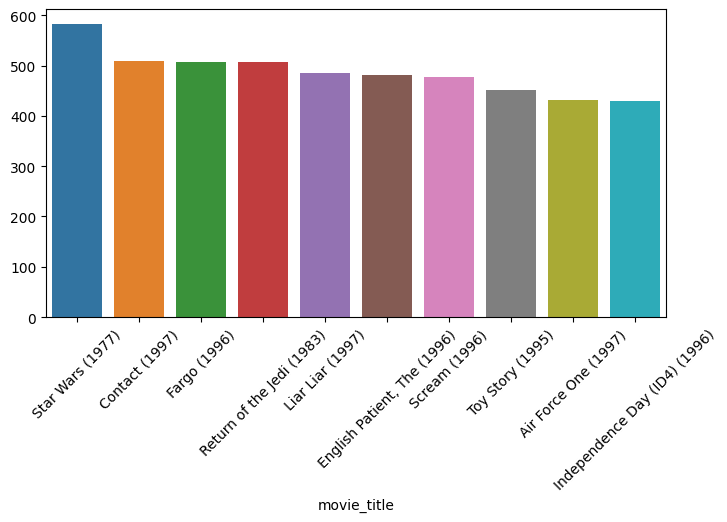

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(x=best.index, y=best.values)
plt.xticks(rotation=45);

In [ ]:
# 반면 최악의 영화 top10은 무엇일까?
worst = df.groupby('movie_title').size().sort_values()[:10]
worst

movie_title
Á köldum klaka (Cold Fever) (1994)            1
Mille bolle blu (1993)                        1
Mat' i syn (1997)                             1
Marlene Dietrich: Shadow and Light (1996)     1
Man from Down Under, The (1943)               1
Mamma Roma (1962)                             1
Mad Dog Time (1996)                           1
Big Bang Theory, The (1994)                   1
MURDER and murder (1996)                      1
Coldblooded (1995)                            1
dtype: int64

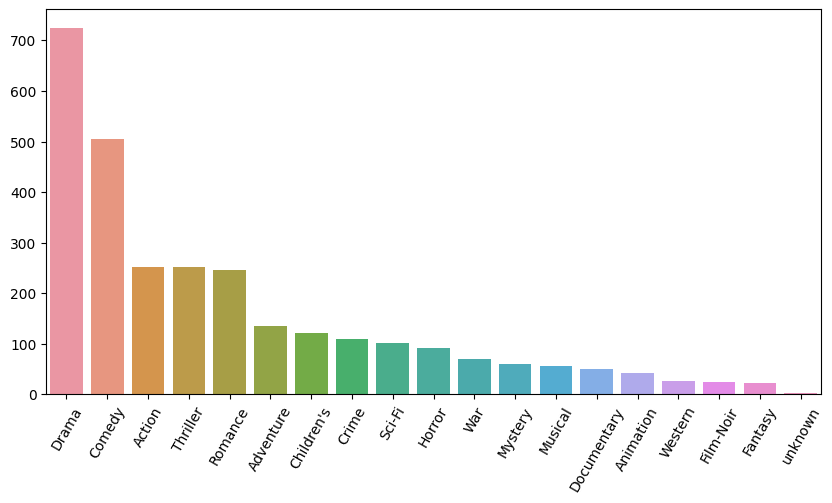

In [ ]:
# 가장 인기있는(혹은 흥행한) 영화의 장르는 무엇일까? - Drama, Comedy, Action, Thriller, Romance ... 순
generes = ['unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 
 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


plt.figure(figsize=(10,5))
genere_counts = items.loc[:,generes].sum().sort_values(ascending=False)
sns.barplot(x=genere_counts.index, y=genere_counts.values)
plt.xticks(rotation=60);

In [ ]:
# 성별별로 선호하는 장르가 다를 수 있을까?
temp_df = rating_user_movie_df.groupby('sex').sum().loc[:,generes]
temp_df = temp_df.transpose()
temp_df

sex,F,M
unknown,12,26
Action,6297,14761
Adventure,3451,8256
Animation,1143,2665
Children's,2433,5809
Comedy,9437,22131
Crime,2342,5429
Documentary,526,1188
Drama,11523,27333
Fantasy,407,1025


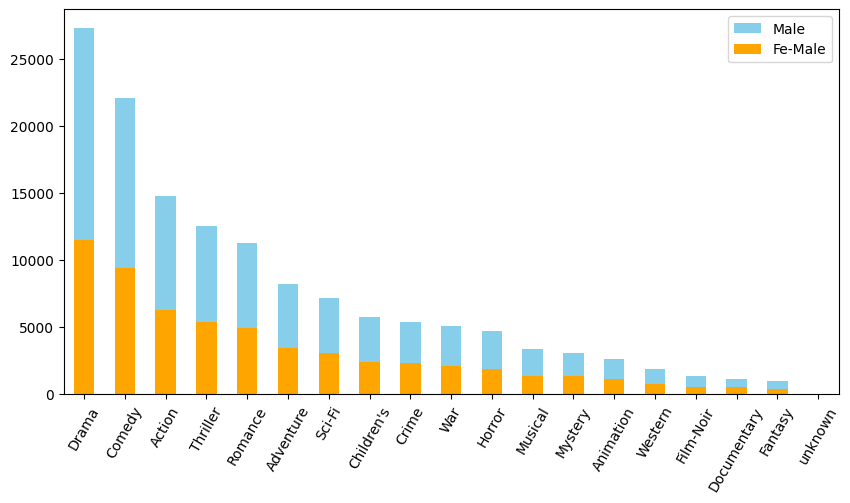

In [ ]:
# 두 성별이 선호하는 장르의 순서가 같음을 알 수 있다.
plt.figure(figsize=(10, 5))

temp_df.M.sort_values(ascending=False).plot(kind='bar', color='skyblue', label="Male")
temp_df.F.sort_values(ascending=False).plot(kind='bar', color='orange', label="Fe-Male")
plt.legend()
plt.xticks(rotation=60)
plt.show()

In [ ]:
# 피드백7
# 이런 스택챠트 보다 바 챠트를 양쪽으로.
# 여자의 경우 뮤지컬 - 미스테리 비율 달라요... 따라서 성별별로 따로 그리는 것이 좋다.

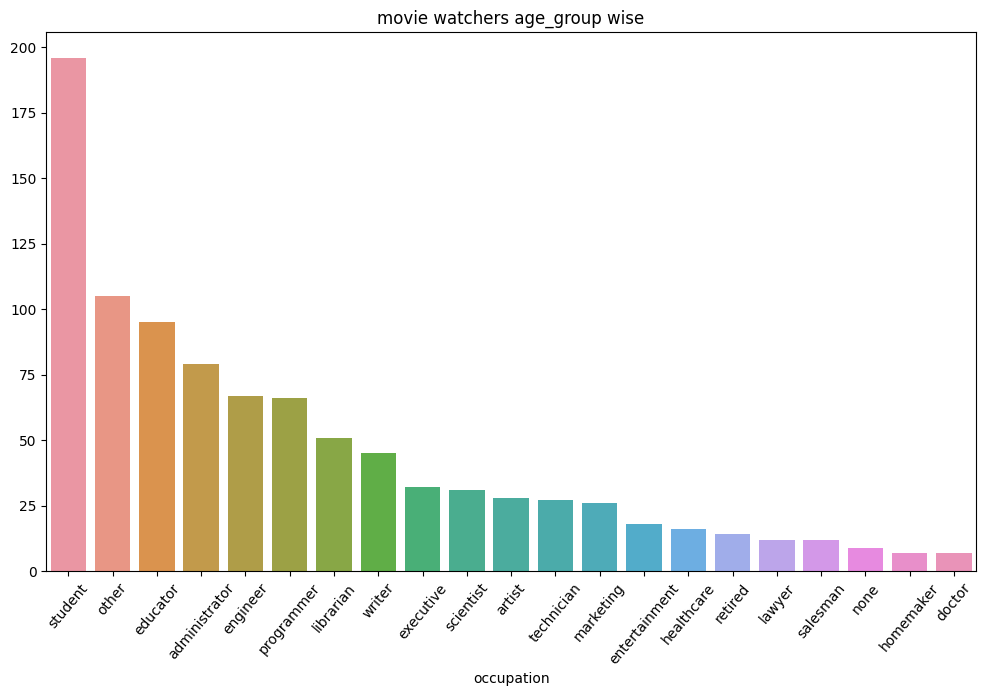

In [ ]:
# 직업군별(occupation) 영화 관람 빈도수
plt.figure(figsize=(12,7))
movie_watcher_occupants = users.groupby('occupation').size().sort_values(ascending=False)
sns.barplot(x=movie_watcher_occupants.index, y=movie_watcher_occupants.values)
plt.title('movie watchers age_group wise')
plt.xticks(rotation=50);

In [ ]:
temp_df2 = rating_user_movie_df.groupby('occupation').sum().loc[:,generes]
temp_df2 = temp_df2.transpose()
temp_df2

occupation,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
unknown,6,3,1,2,1,0,1,1,1,0,...,1,1,4,3,1,0,1,6,1,2
Action,2087,690,169,2053,1535,426,775,323,146,189,...,565,233,2364,1250,323,320,921,4090,570,862
Adventure,1146,386,102,1136,901,230,448,178,83,92,...,317,119,1278,668,190,186,537,2291,321,458
Animation,404,123,36,317,274,74,168,57,22,33,...,101,42,415,198,81,79,189,760,84,152
Children's,834,261,58,782,560,170,327,115,58,65,...,249,93,877,515,135,137,372,1614,223,343
Comedy,3179,960,254,3161,2200,661,1218,483,227,290,...,841,337,3459,1866,492,498,1484,6074,850,1264
Crime,807,227,64,774,530,164,279,125,59,58,...,236,73,830,496,111,124,338,1468,223,356
Documentary,175,50,10,192,117,29,67,22,16,10,...,52,16,176,110,31,22,80,322,43,67
Drama,3870,1172,333,4040,2795,757,1380,599,313,320,...,1149,368,4254,2455,536,604,1716,7378,1054,1574
Fantasy,147,40,9,135,95,35,53,18,7,6,...,42,11,167,107,23,23,65,255,41,58


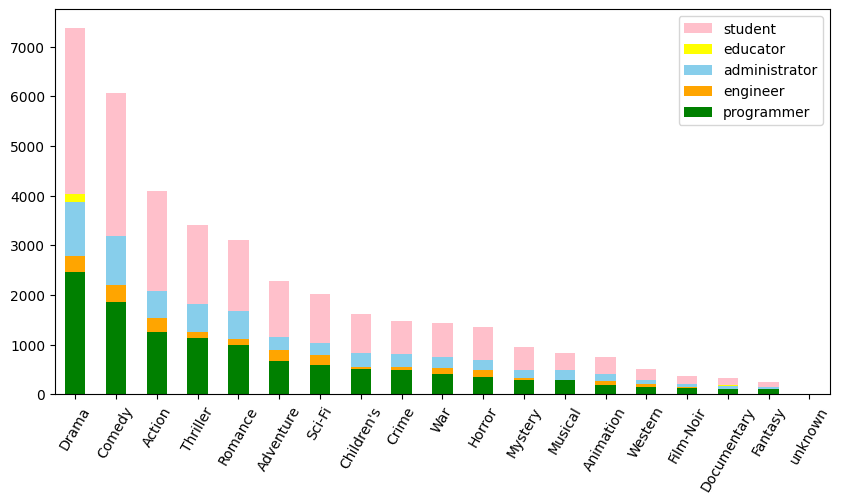

In [ ]:
# Top 5 직군에 대해서 인기있는 영화 장르는? (other 직군 제외)
# student의 비율이 압도적으로 높으며, 여타 다른 직군들도 비슷한 흐름으로 장르를 선호한다.
plt.figure(figsize=(10, 5))

temp_df2.student.sort_values(ascending=False).plot(kind='bar', color='pink', label="student")
temp_df2.educator.sort_values(ascending=False).plot(kind='bar', color='yellow', label="educator")
temp_df2.administrator.sort_values(ascending=False).plot(kind='bar', color='skyblue', label="administrator")
temp_df2.engineer.sort_values(ascending=False).plot(kind='bar', color='orange', label="engineer")
temp_df2.programmer.sort_values(ascending=False).plot(kind='bar', color='green', label="programmer")

plt.legend()
plt.xticks(rotation=60)
plt.show()

In [ ]:
# 피드백8
# 위의 그래프도 스택 챠트가 아니라, 따로 표현하는 것이 좋다.
# 각 그룹의 비율이 다를 수 있어요.

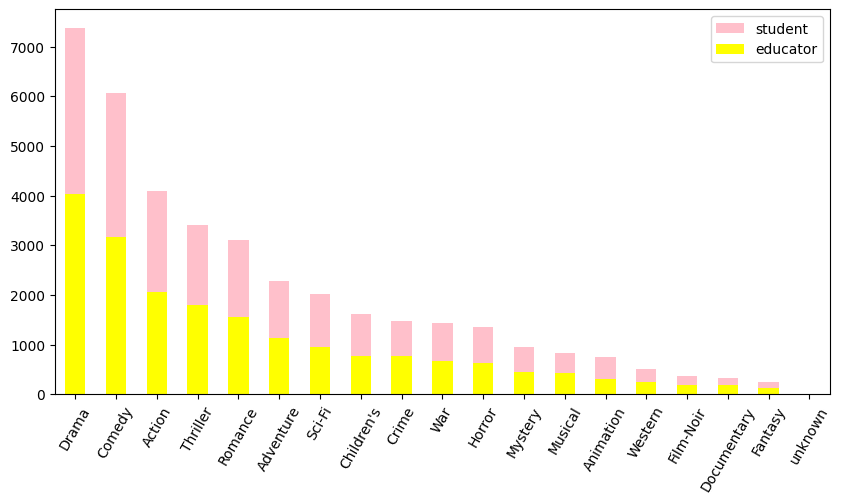

In [ ]:
# educator 그룹이 제대로 보이지 않아서 student 그룹군과 재비교.
plt.figure(figsize=(10, 5))

temp_df2.student.sort_values(ascending=False).plot(kind='bar', color='pink', label="student")
temp_df2.educator.sort_values(ascending=False).plot(kind='bar', color='yellow', label="educator")

plt.legend()
plt.xticks(rotation=60)
plt.show()

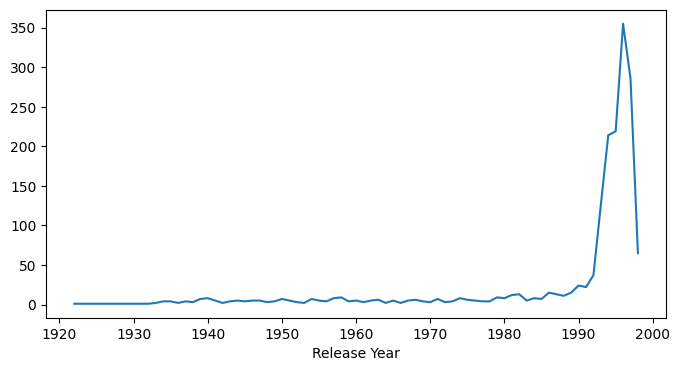

In [ ]:
# 영화 개봉 시기는?
# 1990 - 2000 사이에 영화 개봉이 가장 활발하게 일어났음을 알 수 있다.
# 그래프 상에서 2000년대 이후의 영화는 급격한 하락을 보이나, 이는 불완전한 데이터가 원인으로 보인다.
plt.figure(figsize=(8,4))
yearly_release_counts = items.groupby(items['release_date'].dt.year).size().sort_values(ascending=False)

sns.lineplot(x=yearly_release_counts.index, y=yearly_release_counts.values);
plt.xlabel('Release Year');

In [ ]:
# 피드백9
# EDA는 데이터에 입각 - 2000년도의 데이터 분포를 보여줘야한다.
# 지금 제가 낸 의견은 주관적입니다. -> 근거가 있어야 합니다.

In [ ]:
# 연령대 구분하기
"""
[전체관람, 12세 이상 관람, 15세 이상 관람, 청소년 관람 불가]

위의 기준에 따라서 평가인원들의 나이를 다음과 같이 구분하고자 한다.
5-12 : child (아이)
13-18 : teenager (청소년)
19-35 : adult (성인)
36-55 : middle age (중년)
56- : old age(노년)
"""

print("가장 적은 나이의 user :", users.age.min(), "세")
print("가장 많은 나이의 user :", users.age.max(), "세")

가장 적은 나이의 user : 7 세
가장 많은 나이의 user : 73 세


In [ ]:
users['age_group'] = users.age.apply(lambda age: 'child' if 5<=age<=12 else ('teenager' if 13<=age<=18 else ('adult' if 19<=age<=35 else ('middle age' if 36<=age<=55 else 'old age'))))
users.head(10)

,user_id,age,sex,occupation,zip_code,age_group
0,1,24,M,technician,85711,adult
1,2,53,F,other,94043,middle age
2,3,23,M,writer,32067,adult
3,4,24,M,technician,43537,adult
4,5,33,F,other,15213,adult
5,6,42,M,executive,98101,middle age
6,7,57,M,administrator,91344,old age
7,8,36,M,administrator,05201,middle age
8,9,29,M,student,01002,adult
9,10,53,M,lawyer,90703,middle age


In [ ]:
users['age_group'].value_counts(normalize=True)

adult         0.548250
middle age    0.339343
old age       0.055143
teenager      0.054083
child         0.003181
Name: age_group, dtype: float64

([<matplotlib.patches.Wedge at 0x7fbf8cbd5d60>,
 [Text(-0.16610311202367106, 1.0873866636004197, 'adult'),
  Text(-0.22021240425666308, -1.0777321081843578, 'middle age'),
  Text(0.9473940249057532, -0.5589674065389477, 'old age'),
  Text(1.0802265132630047, -0.20763111530705533, 'teenager'),
  Text(1.0999450614657427, -0.01099371443706807, 'child')],
 [Text(-0.09060169746745694, 0.5931199983275015, '54.8%'),
  Text(-0.12011585686727076, -0.5878538771914678, '33.9%'),
  Text(0.5167603772213198, -0.30489131265760777, '5.5%'),
  Text(0.5892144617798207, -0.11325333562203016, '5.4%'),
  Text(0.5999700335267687, -0.005996571511128037, '0.3%')])

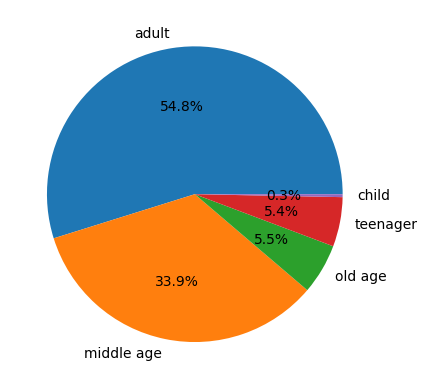

In [ ]:
# 연령대(그룹) 파이챠트 - 성인과 중년 그룹의 파이가 가장 큼을 알 수 있다.
labels = ['adult', 'middle age', 'old age', 'teenager', 'child']
plt.pie(users['age_group'].value_counts(normalize=True), labels=labels, autopct='%.1f%%')

In [ ]:
# 피드백10
# 0.3의 경우에는 크게 의미가 없기 때문에 other 항목으로.
# 의미있는 비율들만 중점적으로 보는 것이 좋아요.

In [ ]:
# 영화별 평가를 당한 빈도(카운트) 확인
movies_count_df = pd.DataFrame(df.groupby('movie_title').size(), columns=['count'])
movies_count_df.head()

,count
movie_title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


Text(0, 0.5, 'number of ratings')

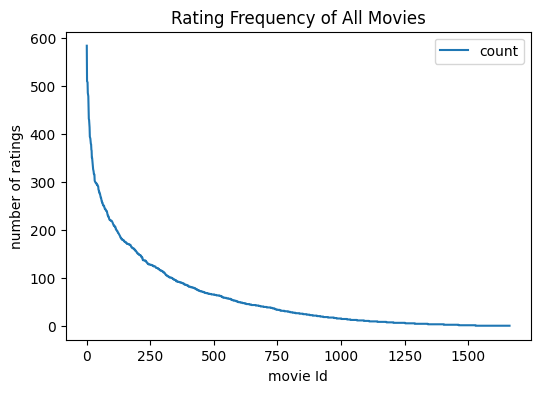

In [ ]:
# 모든 영화의 평가를 당한 빈도(카운트) 그래프
# long tail 속성이 확인되지 않는다. 데이터셋의 크기가 작기 때문일까?
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(6, 4),
        title='Rating Frequency of All Movies',
        fontsize=10
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

# 개인 학습 후 삭제 예정입니다.

In [ ]:
# Reading data from the base and test tables too
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_base = pd.read_csv('./ua.base', sep='\t', names=r_cols, encoding='ISO-8859-1')
ratings_test = pd.read_csv('./ua.test', sep='\t', names=r_cols, encoding='ISO-8859-1')

trainrate = ratings_base.values
testrate = ratings_test.values
print(ratings_base[0:20])

print('Number of traing rates:', trainrate.shape[0])
print('Number of test rates:', testrate.shape[0])

    user_id  movie_id  rating  unix_timestamp
0         1         1       5       874965758
1         1         2       3       876893171
2         1         3       4       878542960
3         1         4       3       876893119
4         1         5       3       889751712
5         1         6       5       887431973
6         1         7       4       875071561
7         1         8       1       875072484
8         1         9       5       878543541
9         1        10       3       875693118
10        1        11       2       875072262
11        1        12       5       878542960
12        1        13       5       875071805
13        1        14       5       874965706
14        1        15       5       875071608
15        1        16       5       878543541
16        1        17       3       875073198
17        1        18       4       887432020
18        1        19       5       875071515
19        1        21       1       878542772
Number of traing rates: 90570
Numb

In [ ]:
len(ratings_base.user_id.unique())

943

In [ ]:
"""
TD_IDF를 사용하여 feature matrix를 변환

Feature Matrix(특성 매트릭스)는 변수를 포함하는 열의 목록을 설명하는 기계 학습 용어이다.
"""

'\nTD_IDF를 사용하여 feature matrix를 변환\n\nFeature Matrix(특성 매트릭스)는 변수를 포함하는 열의 목록을 설명하는 기계 학습 용어이다.\n'

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=True, norm ='l2')
tfidf = transformer.fit_transform(X_train_counts.tolist()).toarray()

print(X_train_counts[0])
#Each row represents the profiles of the items (movies) 
print(tfidf[0])

[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.         0.         0.         0.74066017 0.57387209 0.34941857
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]


In [ ]:
import numpy as np
def get_items_rated_by_user(rate_matrix, user_id):
    """
    return (item_ids, scores)
    """
    y = rate_matrix[:,0] # users
    # Get user rating
    # user_id start = 1 
    ids = np.where(y == user_id +1)[0] 
    item_ids = rate_matrix[ids, 1] - 1 # ids - 1
    scores = rate_matrix[ids, 2]
    return (item_ids, scores)

ids, scores = get_items_rated_by_user(trainrate, 0)
list_head = np.concatenate((ids.reshape(len(ids),1), scores.reshape(len(scores),1)),axis = 1)[0:10]

print(list_head)

[[0 5]
 [1 3]
 [2 4]
 [3 3]
 [4 3]
 [5 5]
 [6 4]
 [7 1]
 [8 5]
 [9 3]]


In [ ]:
# 정규화 사용 선형회귀모형
from sklearn.linear_model import Ridge

d = tfidf.shape[1] # data dimension
W = np.zeros((d, usernum))
b = np.zeros((1, usernum))

for n in range(usernum):    
    ids, scores = get_items_rated_by_user(trainrate, n)
    clf = Ridge(alpha=0.01, fit_intercept  = True)
    Xhat = tfidf[ids, :]
    
    clf.fit(Xhat, scores) 
    W[:, n] = clf.coef_
    b[0, n] = clf.intercept_

In [ ]:
# 예측 모델
Yhat = tfidf.dot(W) + b 
print(Yhat[0])

[ 2.91838332  3.99617751  1.90305533  5.65815133  3.47767686  3.05838844
  4.46403862  2.12867456  5.71948497  4.0662216   2.78867412  3.76802972
  3.97783706  4.88342707  1.01632985  4.56433775  0.68230514  4.2489605
  4.07316639  2.87593024  3.93680375  2.24989719  4.12314076  6.36754178
  4.0756652   3.51393606  4.12070886  2.44196263  4.2158422   2.95504543
  4.86363757  2.18626927  3.3100633   3.10872332  5.49186298  4.31455936
  3.95491406  4.76705561  4.01446946  1.97275129  4.14390021  4.88157378
  4.01492637  3.13172094  4.90626492  2.73862331  3.083595    3.17058695
  2.4540473   6.15103648  1.654253    4.22977648  3.36577304  3.62848801
  4.24108739  3.57764463  3.58673435  3.49574654  2.55351982  3.38732379
  2.39646473  3.50710335  3.3520393   2.63247103  2.99513986  2.30218694
  3.47202819  2.12171043  4.19364207  3.13103278  1.63447041  4.01631903
  2.00305762  3.30016535  4.17380961  3.10608768  4.96141764  3.32933047
  4.01039299  1.41307532  3.38607508  3.23501113  2.

In [ ]:
n = 100
ids, scores = get_items_rated_by_user(testrate, 0)
Yhat[n, ids]

print('Rated movies ids:', ids )
print('True ratings:', scores)
print('Predicted ratings:', Yhat[ids, n])

Rated movies ids: [ 19  32  60 116 154 159 170 188 201 264]
True ratings: [4 4 4 3 2 4 5 3 5 4]
Predicted ratings: [3.34104676 3.73483426 2.27814367 3.49831944 2.53738022 2.27814367
 2.38860531 2.59806275 3.20646314 3.06806504]


In [ ]:
#Evaluation regression prediction results
from math import sqrt
def evaluate(Yhat, rates, W, b):
    se = 0
    cnt = 0
    for n in range(usernum):
        ids, scores_truth = get_items_rated_by_user(rates, n)
        scores_pred = Yhat[ids, n]
        e = scores_truth - scores_pred 
        se += (e*e).sum(axis = 0)
        cnt += e.size 
    return sqrt(se/cnt)

In [ ]:
#RMSE of previous predictive model
print('RMSE for training:', evaluate(Yhat, trainrate, W, b))
print('RMSE for test    :', evaluate(Yhat, testrate, W, b))

RMSE for training: 0.908980456282672
RMSE for test    : 1.2703282700393035


In [ ]:
# https://www.kaggle.com/code/jamila1999/ml-100k-content-based-filtering

# 협업 필터링 기반 - 사용자와 아이템 간의 평점에 기반에 추천하는 시스템

In [ ]:
rating

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
ratings = rating[['user_id', 'movie_id','rating']]
ratings_matrix = ratings.pivot_table(index='user_id', columns='movie_id')

row level 사용자 평점 데이터 -> 사용자-아이템 평점 행렬로 변환.

ratings를 이용해 아이템 기반의 최근접 이웃 협업 필터링을 구현하기 위해서는 <br/>
row(행) 형태의 원본 데이터(사용자)를 row, 모든 영화를 column으로 구성한 데이터 세트로 변경해야 함. pivot_table() 사용.

NaN은 사용자가 평점을 매기지 않은 영화. 
최소 평점이 0.5 이므로 0으로 변환해야 한다. NaN -> 0

In [ ]:
ratings_matrix 

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 1673 1674   
user_id                                                       ...             
1           5.0  3.0  4.0  3.0  3.0  5.0  4.0  1.0  5.0  3.0  ...  NaN  NaN   
2           4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           4.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
939         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  5.0  NaN  ...  NaN  NaN   
940         NaN  NaN  NaN  2.0  NaN  NaN  4.0  5.0  3.0  NaN  ...  NaN  NaN   
941         5.0  NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  NaN  NaN   
942         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
943         NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  3.0  NaN  ...  NaN  NaN   

                                                  
movie_id 1675 1676 1677 1678 1679 1680 1681 1682  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
939       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
940       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
941       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
942       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
943       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[943 rows x 1682 columns]

In [ ]:
rating_movies = pd.merge(ratings, items, on='movie_id')
ratings_matrix = rating_movies.pivot_table('rating', index='user_id', columns='movie_title')

In [ ]:
rating_movies.head()

,user_id,movie_id,rating,movie_title,release_date,IMDb URL,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 결측치를 0으로 채웁니다.
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


영화간 유사도 산출

행과 열을 바꿔주는 transpose() 함수 적용 후, cosine_similarity() 사용

In [ ]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 유사도 행렬 생성
item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                           columns=ratings_matrix.columns)

print(item_sim_df.shape) # (1664, 1664)
item_sim_df.head()

(1664, 1664)


movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
movie_title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,0.000000,0.024561,0.099561,0.185236,0.159265,0.000000,0.052203,0.000000,0.033326,...,0.000000,0.000000,0.000000,0.027774,0.118840,0.142315,0.029070,0.000000,0.110208,0.000000
1-900 (1994),0.000000,1.000000,0.014139,0.009294,0.007354,0.004702,0.010055,0.067038,0.000000,0.000000,...,0.152499,0.015484,0.000000,0.069284,0.018243,0.023408,0.006694,0.079640,0.042295,0.000000
101 Dalmatians (1996),0.024561,0.014139,1.000000,0.167006,0.061105,0.143878,0.203781,0.225803,0.027642,0.092337,...,0.000000,0.021965,0.030905,0.274877,0.204267,0.101199,0.056976,0.172155,0.045714,0.000000
12 Angry Men (1957),0.099561,0.009294,0.167006,1.000000,0.056822,0.167235,0.304078,0.422506,0.072682,0.394854,...,0.060946,0.016502,0.000000,0.403270,0.259436,0.145519,0.105226,0.038901,0.060101,0.081261
187 (1997),0.185236,0.007354,0.061105,0.056822,1.000000,0.132327,0.042928,0.065060,0.043133,0.027300,...,0.000000,0.141997,0.000000,0.068257,0.067786,0.091293,0.099490,0.025184,0.142667,0.096449


In [ ]:
# Toy Story (1995)와 유사도가 높은 영화 5개
item_sim_df['Toy Story (1995)'].sort_values(ascending=False)[1:6]

movie_title
Star Wars (1977)                 0.734572
Return of the Jedi (1983)        0.699925
Independence Day (ID4) (1996)    0.689786
Rock, The (1996)                 0.664555
Mission: Impossible (1996)       0.641322
Name: Toy Story (1995), dtype: float64

In [ ]:
# Star Wars (1977)와 유사도가 높은 영화 5개
item_sim_df['Star Wars (1977)'].sort_values(ascending=False)[1:6]

movie_title
Return of the Jedi (1983)          0.884476
Raiders of the Lost Ark (1981)     0.764885
Empire Strikes Back, The (1980)    0.749819
Toy Story (1995)                   0.734572
Godfather, The (1972)              0.697332
Name: Star Wars (1977), dtype: float64

# 아이템 기반 최근접 이웃 협업 필터링으로 개인화된 영화 추천

In [ ]:
"""
영화 간 유사도를 가지는 item_sim_df 와 
사용자-영화 평점인 ratings_matrix 변수를 인자로 사용하는 predict_rating() 함수
"""
def predict_rating(ratings_arr, item_sim_arr):
  ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
  return ratings_pred

In [ ]:
# 개인화된 예측 평점
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index,
                                   columns=ratings_matrix.columns)

print(ratings_pred_matrix.shape)
ratings_pred_matrix.head()

(943, 1664)


movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.800047,0.687024,1.045449,1.157588,0.675452,1.018263,1.111532,1.210994,0.686497,1.064237,...,0.300394,0.748107,1.114205,1.160833,1.118462,1.039966,0.907547,0.519887,1.461840,0.414830
2,0.252178,0.093653,0.218079,0.185036,0.256987,0.248438,0.136862,0.182160,0.351622,0.160204,...,0.014181,0.203792,0.144958,0.166343,0.148763,0.135498,0.221145,0.161623,0.199989,0.119951
3,0.146608,0.070257,0.081746,0.082510,0.238730,0.116526,0.065184,0.087163,0.142448,0.068789,...,0.018121,0.163108,0.090083,0.071387,0.082338,0.074866,0.131544,0.041978,0.138940,0.059507
4,0.092932,0.033160,0.078952,0.071485,0.137708,0.087751,0.065958,0.078071,0.096892,0.058886,...,0.024887,0.121865,0.069636,0.068834,0.077476,0.073654,0.091601,0.048016,0.092492,0.039130
5,0.352339,0.328993,0.610181,0.562764,0.320814,0.477852,0.640443,0.625226,0.336425,0.556617,...,0.266746,0.411311,0.579812,0.652030,0.623810,0.621068,0.411165,0.298185,0.870858,0.128627


In [ ]:
# 사용자별 영화의 실제 평점 *(dot-내적) 영화의 코사인 유사도 한 값
# 영화를 관람하지 않아서 0에 해당했던 평점이 예측에서는 값이 부여되는 경우 발생.

In [ ]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
  pred = pred[actual.nonzero()].flatten()
  actual = actual[actual.nonzero()].flatten()
  return mean_squared_error(pred, actual)

print("아이템 기반 모든 인접 이웃 MSE : ", get_mse(ratings_pred, ratings_matrix.values))

아이템 기반 모든 인접 이웃 MSE :  8.689548194545287


In [ ]:
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
  pred = np.zeros(ratings_arr.shape)

  for col in range(ratings_arr.shape[1]):
    top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
    for row in range(ratings_arr.shape[0]):
      pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
      pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))

    return pred

In [ ]:
ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n=20)
print('아이템 기반 인접 Top-20 이웃 MSE' , get_mse(ratings_pred, ratings_matrix.values))

ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index,
                                   columns=ratings_matrix.columns)

아이템 기반 인접 Top-20 이웃 MSE 13.726576878376967


In [ ]:
# 26번 user가 평점을 준 영화를 내림차순으로 나열 (최대 10개)
user_rating_id = ratings_matrix.loc[26, :]
user_rating_id[user_rating_id > 0].sort_values(ascending=False)[:10]

movie_title
L.A. Confidential (1997)     5.0
Godfather, The (1972)        5.0
Fargo (1996)                 5.0
Titanic (1997)               5.0
Leaving Las Vegas (1995)     4.0
Brassed Off (1996)           4.0
Mr. Holland's Opus (1995)    4.0
Phenomenon (1996)            4.0
Full Monty, The (1997)       4.0
Fly Away Home (1996)         4.0
Name: 26, dtype: float64

In [ ]:
# user가 이미 평점을 준 영화를 제외하고 추천할 수 있도록, 평점을 주지 않는 영화를 리스트로 반환하는 함수.
def get_yetsee_movies(rating_matrix, userid):
  user_rating = ratings_matrix.loc[userid, :]
  already_seen = user_rating[user_rating > 0].index.tolist()
  movies_list = ratings_matrix.columns.tolist()
  yetsee_list = [movie for movie in movies_list if movie not in already_seen]

  return yetsee_list

In [ ]:
def recomm_movie_by_userid(pred_df, userid, yetsee_list, top_n=10):
  recomm_movies = pred_df.loc[userid, yetsee_list].sort_values(ascending=False)[:top_n]
  return recomm_movies

In [ ]:
# 문제 발생
yetsee_list = get_yetsee_movies(ratings_matrix, 26)
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 26, yetsee_list, top_n=10)

recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index, columns=['pred_score'])
recomm_movies                  

,pred_score
movie_title,
'Til There Was You (1997),0.0
Office Killer (1997),0.0
Outbreak (1995),0.0
Out to Sea (1997),0.0
"Other Voices, Other Rooms (1997)",0.0
Othello (1995),0.0
Oscar & Lucinda (1997),0.0
Orlando (1993),0.0
Original Gangstas (1996),0.0


# **KNN**

In [ ]:
# NaN을 0으로 맵핑한 ratings_matrix
ratings_matrix.head()

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


In [ ]:
# transform matrix to scipy sparse matrix
user_to_movie_sparse_df = csr_matrix(ratings_matrix.values)
user_to_movie_sparse_df

<943x1664 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

In [ ]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# 입력한 사용자와 유사한 사용자 상위 N명 찾기.
def get_similar_users(user, n = 5):

  knn_input = np.asarray([ratings_matrix.values[user-1]]) # .reshape(1,-1)
  # knn_input = ratings_matrix.iloc[0,:].values.reshape(1,-1)
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("유저번호", user, "(과)와 가장 비슷한 성향의 사람들 Top",n)
  print(" ")
  for i in range(1,len(distances[0])):
    print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]

In [ ]:
refined_dataset = df.groupby(by=['user_id','movie_title'], as_index=False).agg({"rating":"mean"})
refined_dataset.head()

,user_id,movie_title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


In [ ]:
from pprint import pprint

user_id = 1
print("사용자가 관람한 몇 편의 영화") # 최대 10편
pprint(list(refined_dataset[refined_dataset['user_id'] == user_id]['movie_title'])[:10])
print("\n")
similar_user_list, distance_list = get_similar_users(user_id,5)

사용자가 관람한 몇 편의 영화
['101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 'Abyss, The (1989)',
 'Ace Ventura: Pet Detective (1994)',
 'Air Bud (1997)',
 'Akira (1988)',
 'Aladdin (1992)',
 'Alien (1979)']


유저번호 1 (과)와 가장 비슷한 성향의 사람들 Top 5
 
1 . User: 916 separated by distance of 0.43370684572283824
2 . User: 864 separated by distance of 0.45072303405995173
3 . User: 457 separated by distance of 0.4586364637463427
4 . User: 92 separated by distance of 0.4605851707991683
5 . User: 268 separated by distance of 0.461117118474631


In [ ]:
similar_user_list, distance_list

(array([916, 864, 457,  92, 268]),
 array([0.43370685, 0.45072303, 0.45863646, 0.46058517, 0.46111712]))

In [ ]:
# 가중치 리스트 = 거리(벡터)리스트 / 거리(벡터)리스트의 총합
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.19150161, 0.19901505, 0.20250919, 0.20336964, 0.20360451])

In [ ]:
mov_rtngs_sim_users = ratings_matrix.values[similar_user_list]
mov_rtngs_sim_users

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
movies_list = ratings_matrix.columns
movies_list

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='movie_title', length=1664)

In [ ]:
print("가중치 리스트 형태:", len(weightage_list))
print("mov_rtngs_sim_users shape:", mov_rtngs_sim_users.shape)
print("영화 수:", len(movies_list))

가중치 리스트 형태: 5
mov_rtngs_sim_users shape: (5, 1664)
영화 수: 1664
